<a href="https://colab.research.google.com/github/Yash-singh25/test_project/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
!pip install tensorflow==2.0.0

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import*
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.cluster import *
from sklearn.svm import *

In [146]:
dataset = pd.read_csv('/content/datasets_19_420_Iris.csv')
print(dataset.shape)

(150, 6)


In [147]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [149]:
dataset_train = dataset.copy()

In [150]:
dataset_train['Species'] = dataset_train['Species'].apply(lambda x : x.split('-')[1])

In [151]:
dataset_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


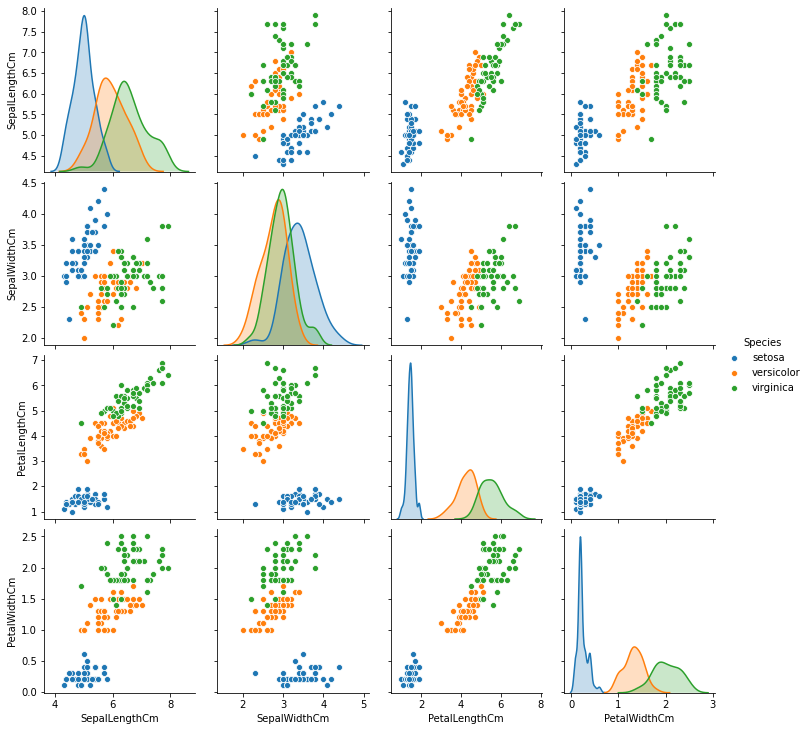

In [152]:
sns.pairplot(dataset_train.iloc[: , 1:] , hue = "Species")

In [153]:
dataset_train['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [154]:
iris_setosa = []
iris_versicolor = []
iris_virginica = []
for i in dataset_train.keys()[1:5]:
  mean_petal_length1 = dataset_train[i][dataset_train['Species'] == 'setosa'].mean()
  mean_petal_length2 = dataset_train[i][dataset_train['Species'] == 'versicolor'].mean()
  mean_petal_length3 = dataset_train[i][dataset_train['Species'] == 'virginica'].mean()
  print('the mean length for {} for setosa is {:0.2f} cm'.format(i , (mean_petal_length1)))
  print('the mean length for {} for versicolor is {:0.2f} cm'.format(i , (mean_petal_length2)))
  print('the mean length for {} for virginica is {:0.2f} cm'.format(i , (mean_petal_length3)))
  iris_setosa.append(mean_petal_length1)
  iris_versicolor.append(mean_petal_length2)
  iris_virginica.append(mean_petal_length3)

the mean length for SepalLengthCm for setosa is 5.01 cm
the mean length for SepalLengthCm for versicolor is 5.94 cm
the mean length for SepalLengthCm for virginica is 6.59 cm
the mean length for SepalWidthCm for setosa is 3.42 cm
the mean length for SepalWidthCm for versicolor is 2.77 cm
the mean length for SepalWidthCm for virginica is 2.97 cm
the mean length for PetalLengthCm for setosa is 1.46 cm
the mean length for PetalLengthCm for versicolor is 4.26 cm
the mean length for PetalLengthCm for virginica is 5.55 cm
the mean length for PetalWidthCm for setosa is 0.24 cm
the mean length for PetalWidthCm for versicolor is 1.33 cm
the mean length for PetalWidthCm for virginica is 2.03 cm


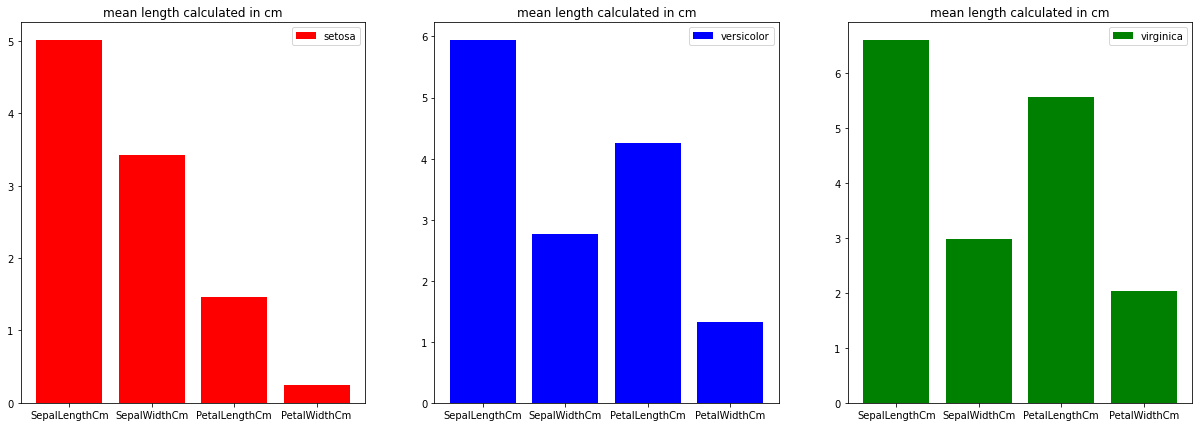

In [155]:
plt.figure(figsize = (21 , 7))
plt.subplot(1,3,1)
plt.title('mean length calculated in cm')
plt.bar(dataset_train.keys()[1:5] , iris_setosa , color = 'r' , label = 'setosa')
plt.legend()
plt.subplot(1,3,2)
plt.title('mean length calculated in cm')
plt.bar(dataset_train.keys()[1:5] , iris_versicolor , color = 'b' , label = 'versicolor')
plt.legend()
plt.subplot(1,3,3)
plt.title('mean length calculated in cm')
plt.bar(dataset_train.keys()[1:5] , iris_virginica , color = 'g' , label = 'virginica')
plt.legend()
plt.show()

In [156]:
dataset_train1= dataset_train.copy()

In [157]:
dataset_train1 = dataset_train1.drop(dataset_train1[['Id']] , axis = 1)

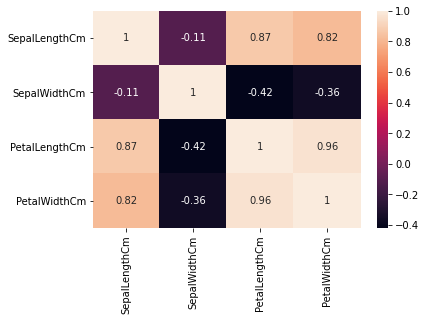

In [158]:
sns.heatmap(dataset_train1.corr() , annot= True)

In [159]:
y = dataset_train1.pop('Species')

In [160]:
x_train , x_test , y_train , y_test = train_test_split(dataset_train1 , y , test_size = 0.2 , random_state = 20)

In [161]:
y_train

95     versicolor
88     versicolor
0          setosa
46         setosa
11         setosa
          ...    
22         setosa
75     versicolor
137     virginica
15         setosa
99     versicolor
Name: Species, Length: 120, dtype: object

In [162]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [163]:
obj = SVC()
model = obj.fit(x_train , y_train)
predict_train = obj.predict(x_train)
predict_test = obj.predict(x_test)

In [164]:
y_train[0:5]

95    versicolor
88    versicolor
0         setosa
46        setosa
11        setosa
Name: Species, dtype: object

In [165]:
predict_train[0:5]

array(['versicolor', 'versicolor', 'setosa', 'setosa', 'setosa'],
      dtype=object)

In [166]:
print(accuracy_score(y_train , predict_train))
print(accuracy_score(y_test , predict_test))

0.9583333333333334
1.0


In [167]:
classification_report(y_train , predict_train)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        42\n  versicolor       0.93      0.95      0.94        39\n   virginica       0.95      0.92      0.94        39\n\n    accuracy                           0.96       120\n   macro avg       0.96      0.96      0.96       120\nweighted avg       0.96      0.96      0.96       120\n'

In [168]:
classification_report(y_test , predict_test)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00         8\n  versicolor       1.00      1.00      1.00        11\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [172]:
obj = LogisticRegression()
model = obj.fit(x_train , y_train)
predict_train = obj.predict(x_train)
predict_test = obj.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [173]:
print(accuracy_score(y_train , predict_train))
print(accuracy_score(y_test , predict_test))

0.9666666666666667
0.9333333333333333


In [174]:
classification_report(y_train , predict_train)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        42\n  versicolor       0.97      0.92      0.95        39\n   virginica       0.93      0.97      0.95        39\n\n    accuracy                           0.97       120\n   macro avg       0.97      0.97      0.97       120\nweighted avg       0.97      0.97      0.97       120\n'

In [175]:
classification_report(y_test , predict_test)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00         8\n  versicolor       0.85      1.00      0.92        11\n   virginica       1.00      0.82      0.90        11\n\n    accuracy                           0.93        30\n   macro avg       0.95      0.94      0.94        30\nweighted avg       0.94      0.93      0.93        30\n'